In [1]:
from periodic_orbits import is_periodic, is_equilibrium, stg_coordinate, get_periodic_domains
from ode_functions import theta_from_param,ic_function, fun, convert_to_dict, get_parameter_node, get_ic_domain, plot_projections, plot_time_series, plot_phase_projection
from ipynb.fs.full.ode_functions import get_param_distance, param_line, lower_double_id, upper_double_id, separate, generate_all_lines, check_list
from periodic_orbits2 import check_sequence
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.decomposition import PCA

In [2]:
#decay rates
decays = {'d_p' : 1, 'd_mc' : 1, 'd_mn' : 1}

#hill coefficient
n = 90

#ode solver parameters
t0 = 0
tf = 100

In [3]:
#Import parameters

no1 = pd.read_csv("Parameter_datasets/P1NoBWnode1.csv", header = None)
noparams1 = convert_to_dict(no1)
noparams1['thetaMnMc'] = noparams1['thetaMcMc']

no2 = pd.read_csv("Parameter_datasets/P1NoBWnode2.csv", header = None)
noparams2 = convert_to_dict(no2)
noparams2['thetaMnMc'] = noparams2['thetaMcMc']

no3 = pd.read_csv("Parameter_datasets/P1NoBWnode3.csv", header = None)
noparams3 = convert_to_dict(no3)
noparams3['thetaMnMc'] = noparams3['thetaMcMc']

no4 = pd.read_csv("Parameter_datasets/P1NoBWnode4.csv", header = None)
noparams4 = convert_to_dict(no4)
noparams4['thetaMnMc'] = noparams4['thetaMcMc']

no5 = pd.read_csv("Parameter_datasets/P1NoBWnode5.csv", header = None)
noparams5 = convert_to_dict(no5)
noparams5['thetaMnMc'] = noparams5['thetaMcMc']

no6 = pd.read_csv("Parameter_datasets/P1NoBWnode6.csv", header = None)
noparams6 = convert_to_dict(no6)
noparams6['thetaMnMc'] = noparams6['thetaMcMc']

no7 = pd.read_csv("Parameter_datasets/P1NoBWnode7.csv", header = None)
noparams7 = convert_to_dict(no7)
noparams7['thetaMnMc'] = noparams7['thetaMcMc']

no8 = pd.read_csv("Parameter_datasets/P1NoBWnode8.csv", header = None)
noparams8 = convert_to_dict(no8)
noparams8['thetaMnMc'] = noparams8['thetaMcMc']

no9 = pd.read_csv("Parameter_datasets/P1NoBWnode9.csv", header = None)
noparams9 = convert_to_dict(no9)
noparams9['thetaMnMc'] = noparams9['thetaMcMc']

no10 = pd.read_csv("Parameter_datasets/P1NoBWnode10.csv", header = None)
noparams10 = convert_to_dict(no10)
noparams10['thetaMnMc'] = noparams10['thetaMcMc']

#generated a few more parameters in Mathematica with FindInstance. Just to see if maybe any of these give length 6.
no11 = pd.read_csv("Parameter_datasets/P1NoBWnode11.csv", header = None)
noparams11 = convert_to_dict(no11)
noparams11['thetaMnMc'] = noparams11['thetaMcMc']

no12 = pd.read_csv("Parameter_datasets/P1NoBWnode12.csv", header = None)
noparams12 = convert_to_dict(no12)
noparams12['thetaMnMc'] = noparams12['thetaMcMc']

no13 = pd.read_csv("Parameter_datasets/P1NoBWnode13.csv", header = None)
noparams13 = convert_to_dict(no13)
noparams13['thetaMnMc'] = noparams13['thetaMcMc']

no14 = pd.read_csv("Parameter_datasets/P1NoBWnode14.csv", header = None)
noparams14 = convert_to_dict(no14)
noparams14['thetaMnMc'] = noparams14['thetaMcMc']

no15 = pd.read_csv("Parameter_datasets/P1NoBWnode15.csv", header = None)
noparams15 = convert_to_dict(no15)
noparams15['thetaMnMc'] = noparams15['thetaMcMc']

no16 = pd.read_csv("Parameter_datasets/P1NoBWnode16.csv", header = None)
noparams16 = convert_to_dict(no16)
noparams16['thetaMnMc'] = noparams16['thetaMcMc']

no17 = pd.read_csv("Parameter_datasets/P1NoBWnode17.csv", header = None)
noparams17 = convert_to_dict(no17)
noparams17['thetaMnMc'] = noparams17['thetaMcMc']

no18 = pd.read_csv("Parameter_datasets/P1NoBWnode18.csv", header = None)
noparams18 = convert_to_dict(no18)
noparams18['thetaMnMc'] = noparams18['thetaMcMc']

no19 = pd.read_csv("Parameter_datasets/P1NoBWnode19.csv", header = None)
noparams19 = convert_to_dict(no19)
noparams19['thetaMnMc'] = noparams19['thetaMcMc']

no_params = [noparams1, noparams2, noparams3, noparams4, noparams5, noparams6, noparams7, noparams8, noparams9,
             noparams10, noparams11, noparams12, noparams13, noparams14, noparams15, noparams16, noparams17, 
             noparams18, noparams19]

In [4]:
#generate ICs in 112 region of parameter 1
no_ICs = []
for i in range(10):
    no_ICs.append(ic_function("112", no_params[0]))

In [5]:
#compute orbit lengths for all parameter, initial condition combinations
no_lengths = []#store orbit lengths, each set of 10 lengths corresponds to different ICs within same parameter
no_sizes = []
for param in no_params:
    theta = theta_from_param(param)
    for IC in no_ICs:
        sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = IC, method = 'BDF')
        output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
        no_lengths.append(len(output))
        no_sizes.append(lower_double_id(output))

/Users/Erika/Documents/Math/Research/periodic_orbits.py:96: UserWarning: get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = 2. The trajectory may not be periodic.
  warnings.warn('get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = {}. The trajectory may not be periodic.'.format(num_periods_to_verify))


In [6]:
#observe orbit lengths (columns are different initial conditions)
endpts = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190]
for i in range(len(endpts)-1):
    print('no_param', i, ':', no_lengths[endpts[i]:endpts[i+1]])

no_param 0 : [8, 8, 8, 8, 8, 8, 8, 8, 70, 8]
no_param 1 : [84, 8, 8, 8, 7, 7, 7, 8, 8, 7]
no_param 2 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
no_param 3 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
no_param 4 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
no_param 5 : [7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
no_param 6 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
no_param 7 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
no_param 8 : [8, 77, 7, 8, 8, 8, 8, 7, 7, 8]
no_param 9 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
no_param 10 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
no_param 11 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
no_param 12 : [8, 8, 8, 8, 8, 8, 8, 8, 70, 8]
no_param 13 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
no_param 14 : [7, 8, 80, 7, 112, 8, 7, 105, 7, 140]
no_param 15 : [8, 8, 8, 8, 8, 8, 8, 8, 70, 8]
no_param 16 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
no_param 17 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
no_param 18 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [7]:
#observe orbit lengths (columns are different initial conditions)
endpts = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190]
for i in range(len(endpts)-1):
    print('no_param', i, ':', no_sizes[endpts[i]:endpts[i+1]])

no_param 0 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
no_param 1 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
no_param 2 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
no_param 3 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
no_param 4 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
no_param 5 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
no_param 6 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
no_param 7 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
no_param 8 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
no_param 9 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Larg

In [8]:
large, small = separate(no_params, '111')

In [9]:
#test
print(small[0] == no_params[10])
print(small[1] == no_params[18])
#cool, it works (finally)

True
True


In [10]:
line_list = generate_all_lines(small, large, 50)

In [11]:
#check dimensions
print(len(line_list))
print(len(small)*len(large))
print(len(line_list[0]))
#cool

34
34
50


In [12]:
%%time
check_list(line_list)

CPU times: user 10min 24s, sys: 4.31 s, total: 10min 28s
Wall time: 11min 2s


[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

So for this particular parameter node and the 10 parameters I sampled from within it, no parameter lines constructed between 'Small' and 'Large' orbit parameters yield different results when run through forward or backward, i.e. no evidence of birythmicity. Note: time to run for just 19 parameters (34 small/long combinations) is about 11 minutes. Is there a more efficient way to do this check?

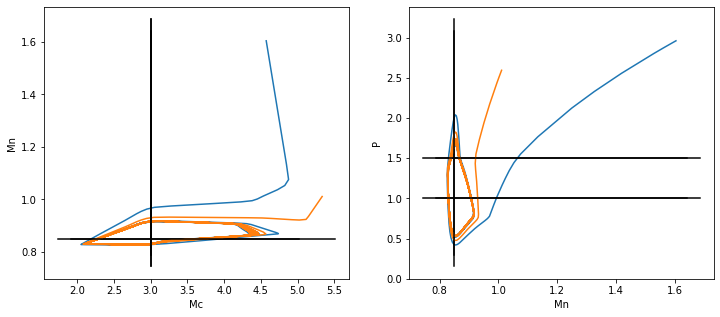

In [14]:
#plotting framework
param = no_params[0]
sol0 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = no_ICs[0], method = 'BDF')
sol1 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = no_ICs[1], method = 'BDF')

fig,(ax1,ax2) = plot_projections(sol0, param)
plot_projections(sol1, param, axs = (ax1, ax2))
# ax1.set_xlim(1,2.75)
# # ax1.set_ylim(0.3,0.8)
# ax2.set_xlim(0.6,1)
# ax2.set_ylim(0,8.5)

### PCA Stuff

In [20]:
#0 is small, 1 is large
no_param_colors = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]

nodf1 = pd.DataFrame.from_dict(noparams1, orient = 'index')
nodf1 = nodf1.T
nodf2 = pd.DataFrame.from_dict(noparams2, orient = 'index')
nodf2 = nodf2.T
nodf3 = pd.DataFrame.from_dict(noparams3, orient = 'index')
nodf3 = nodf3.T
nodf4 = pd.DataFrame.from_dict(noparams4, orient = 'index')
nodf4 = nodf4.T
nodf5 = pd.DataFrame.from_dict(noparams5, orient = 'index')
nodf5 = nodf5.T
nodf6 = pd.DataFrame.from_dict(noparams6, orient = 'index')
nodf6 = nodf6.T
nodf7 = pd.DataFrame.from_dict(noparams7, orient = 'index')
nodf7 = nodf7.T
nodf8 = pd.DataFrame.from_dict(noparams8, orient = 'index')
nodf8 = nodf8.T
nodf9 = pd.DataFrame.from_dict(noparams9, orient = 'index')
nodf9 = nodf9.T
nodf10 = pd.DataFrame.from_dict(noparams10, orient = 'index')
nodf10 = nodf10.T
nodf11 = pd.DataFrame.from_dict(noparams11, orient = 'index')
nodf11 = nodf11.T
nodf12 = pd.DataFrame.from_dict(noparams12, orient = 'index')
nodf12 = nodf12.T
nodf13 = pd.DataFrame.from_dict(noparams13, orient = 'index')
nodf13 = nodf13.T
nodf14 = pd.DataFrame.from_dict(noparams14, orient = 'index')
nodf14 = nodf14.T
nodf15 = pd.DataFrame.from_dict(noparams15, orient = 'index')
nodf15 = nodf15.T
nodf16 = pd.DataFrame.from_dict(noparams16, orient = 'index')
nodf16 = nodf16.T
nodf17 = pd.DataFrame.from_dict(noparams17, orient = 'index')
nodf17 = nodf17.T
nodf18 = pd.DataFrame.from_dict(noparams18, orient = 'index')
nodf18 = nodf18.T
nodf19 = pd.DataFrame.from_dict(noparams19, orient = 'index')
nodf19 = nodf19.T

no_param_data = pd.concat([nodf1,nodf2,nodf3,nodf4,nodf5,nodf6,nodf7,nodf8,nodf9,nodf10,nodf11,nodf12,nodf13,nodf14,
                           nodf15,nodf16,nodf17,nodf18,nodf19])

no_param_data['OrbitLength'] = no_param_colors

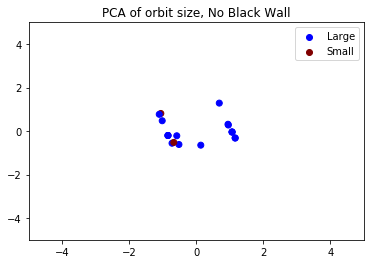

In [21]:
pca = PCA(n_components = 2)
pca.fit(no_param_data.iloc[:,0:17])
no_pca = pca.transform(no_param_data.iloc[:,0:17])

labels = no_param_data.loc[:,'OrbitLength']
label_colors = {0:'maroon',1:'blue'}
cvec = [label_colors[label] for label in labels]
plt.scatter(no_pca[:,0],no_pca[:,1], c = cvec)
plt.scatter(25,25,c = 'blue',label = 'Large')#point at (25,25) just for labeling purposes
plt.scatter(25,25,c = 'maroon', label = 'Small')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('PCA of orbit size, No Black Wall')
plt.legend(loc = 'best')
# plt.savefig('pca_all_attributes.png')
plt.show()
plt.close()